<a href="https://colab.research.google.com/github/1doshi/2022-fall-modern-it/blob/essay/%22Essay_MD_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Диагностика рака шейки матки с применением архитектуры трансформера.

**Реферат**

Трансформеры сделали прорыв в области обработки естественного языка и недавно оказали влияние на область компьютерного зрения. В области анализа медицинских изображений они также успешно используются в полнофункциональных клинических приложениях, включая синтез/реконструкцию изображений, регистрацию, сегментацию, обнаружение и диагностику. В данном эссе будет представлено применение Vision Transformer (VIT) в анализе медицинских изображений, а именно в диагностике рака шейки матки.

**Введение**

Трансформеры доминируют в области обработки естественного языка и активно используются в таких областях, как распознавание речи, синтез, преобразование текста в речь и генерация естественного языка. В качестве примера архитектур глубокого обучения был представлен первый трансформер для обработки последовательных задач вывода в НЛП. 
Принимая во внимание, что рекуррентные нейронные сети явно используют последовательность процессов вывода, трансформеры захватывают долгосрочные зависимости последовательных данных с помощью слоев самовнимания. Таким образом, преобразователи одновременно эффективны, так как решают задачу последовательного обучения за один раз, и эффективны благодаря наложению глубоких моделей. 

Сверточные нейронные сети (CNN) и их варианты достигли современной (SOTA) производительности в нескольких задачах компьютерного зрения, отчасти благодаря их постепенно увеличивающимся рецептивным полям, которые могут изучать иерархии структурированных представлений изображений, таких как семантика. Захват визуальной семантики в изображениях обычно считается основной идеей, позволяющей создавать успешные сети в CV. Однако долгосрочные зависимости внутри изображений, такие как нелокальная корреляция объектов на изображении, в CNN игнорируются. После успеха трансформеров в НЛП, был разработал преобразователь зрения (ViT), сформулировав классификацию изображений как задачу прогнозирования последовательности для последовательности фрагментов (областей) изображения, тем самым фиксируя долгосрочные зависимости во входном изображении. ViT и его производные экземпляры достигли производительности SOTA в нескольких наборах тестовых данных и стали очень популярными в широком спектре задач CV.










**Классический трансформер: как работает?**

Изначально архитектура Трансформера строилась по принципу энкодера-декодера, и решала задачи машинного перевода. Грубо говоря, есть часть, которая кодирует текст на вход — энкодер, а есть та, которая потом декодирует в другой текст на другом языке — декодер.

Нас интересует элемент под названием энкодер. Декодер в некоторых задачах компьютерного зрения тоже используют, но энкодер все-таки чаще. Тем более, что они похожи — за исключением нескольких различий.

Устроен он довольно просто: есть базовый блок, из которого складывается энкодер, то есть n повторяющихся базовых блоков. Внутри базового блока есть несколько слоев, самые важные из которых — Self-Attention, Layer normalization, skip connections и dense layer.

**Self-Attention**

Идея следующая: у нас есть некий токен, и мы хотим оценить важность других токенов относительно него. Эту операцию мы будем проводить со всеми имеющимися токенами.

Так мы посмотрим, как каждый токен влияет на другой. Сам механизм, который мы назвали self-attention, имеет несколько модификаций — на слайде находится классическая версия. Он основан на scaled dot-product attention и устроен из некоторого перемножения матриц. У нас есть input матрица Х на входе — это матрица эмбеддингов, также у нас есть n — количество токенов и размерность d — размер эмбеддингов, либо их еще называют model size. Здесь же мы видим три матрицы весов, которые обучаем, c тремя разными значениями query key value.

Все эти матрицы одинаковы с точки зрения размерности, но имеют несколько разный смысл. Перемножив эти матрицы на матрицу на входе, мы получим три других матрицы — Q, K, V. После того, как мы нашли другие матрицы наших изначальных эмбеддингов, мы проводим следующую операцию: умножаем матрицу Q на транспонированную матрицу К, нормализуем, считаем софтмакс по строке и умножаем на последнюю матрицу V.

Таким образом, мы взвешиваем важность токенов в матрице V, при этом посчитав self-attention относительно друг друга. Если посмотреть на размерность матрицы после перемножения Q на К, она будет n-ная — получается, что мы смотрим на все токены относительно всех других.

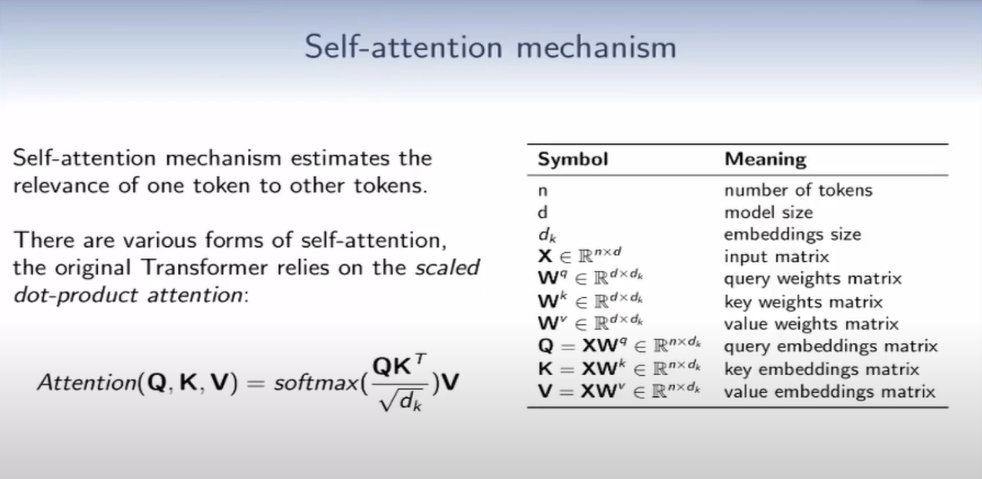

**Multi-head attention**

Self-attention сам по себе не применяют, для него придумана надстройка, которую называют Multi-head attention. Её концепция в том, чтобы использовать не одну матрицу весов для каждого Query-Key-Value, а целый набор разных матриц, которые будут проецировать наши эмбеддинги в некоторое пространство в размерности меньше первоначальной. Там мы будем применять self-attention и все полученные после операций значения мы сконкатенируем.

Чтобы вернуться в изначальную размерность мы выполним операцию домножения на матрицу — это линейная проекция, которая поможет вернуть нужную нам размерность. Концептуально это звучит сложно, и непонятно, почему это должно работать, но люди в процессе пытались включить интуицию.

Рассмотрим пример обработки естественных языков. Если посмотреть на отдельные токены и self-attention в разных головах, то они смотрят на разные токены. В одной голове относительно токена  «it» будет токен «the animal». То есть имя то же, но в другом виде. Во второй голове мы будем уже смотреть на глагол относительно токена. Теоретически интуиция работает не всегда: если смотреть на более свежие слои и другие головы, уже не понятно, что учится, но на практике интуиция работает.

После того, как мы вспомнили, что такое трансформер и self-attention, вопрос: зачем это применять в компьютерном зрении, если есть сверточные сетки, которые себя зарекомендовали? Вроде они и сами отлично работают последние десятилетия, достигают действительно хороших результатов в задачах.

Если подумать, в сверточных нейросетях заложены априорные знания о том, как устроены картинки. Это одна из причин, почему они так хорошо действуют. Есть так называемые inductive bias или inductive priors, которые позволяют нам уменьшать количество данных, необходимых для обучения сетей. Им немного проще решать задачу, чем полносвязным сетям либо трансформеру, который не обладает такими знаниями.

Примером такого явления служит понятие локальности. Оно заключается в том, что пиксели, которые находятся рядом, больше скоррелированы между собой. Может произойти так, что у нас происходит резкий скачок в значениях пикселей. Это говорит о том, что есть некоторая локальность объекта, и если мы нашли его признаки, нужно смотреть в окрестностях.

Вторая причина — это translation variants. Если мы меняем положение нашего объекта на картинке, свертка так или иначе до него дойдёт, что совсем не очевидно с полносвязными слоями. Если мы применяем инпут, для сетей это будет уже совсем другой инпут и другой результат.


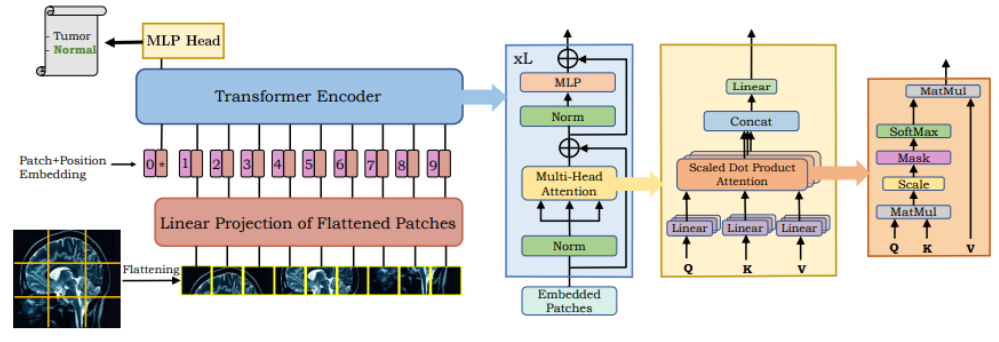

**Vision Transformer**


Всех этих особенностей в трансформере нет. Соответственно, чтобы он хорошо работал, нужно всё это выучить, а чтобы выучить, нужно много данных. 

Вторая причина — это как подавать на вход картинку для такой модели. Модели и статьи, которые были до этого, предлагали собрать некоторое внутреннее представление с помощью сверточных нейросетей, и у нас уже уменьшится разрешение до совсем крохотных размеров. Все, что выучили, уже будем подавать на вход.

Первая идея, которая приходит в голову, — выкинуть картинку в один огромный вектор, где каждый пиксель — компонент вектора. Но это не очень хорошая мысль потому что размерность вектора n, которая квадратична, будет слишком огромной. Авторы статьи  «An Image is Worth 16x16 Words» предложили нарезать картинку на некоторое количество небольших кусков 16х16 и использовать их вместо целой картинки.

Это гиперпараметр, от которого напрямую зависит количество токенов. На слайде это параметр обозначен как P (Patch size), мы делим на него, и получаем обратную пропорциональную зависимость. Изображение нарезаем последовательно на несколько патчей, и с помощью некой обучаемой матрицы эмбеддингов мы проецируем нужную нам размерность. Также есть набор токенов с заданным размером эмбеддингов, и мы можем подавать его на вход трансформерам.

Ещё одна небольшая деталь — это positional encoding. Трансформер сам по себе ничего не знает про расположение пикселей в пространстве, для него это просто множество токенов. А для того, чтобы выстроить токены в последовательность, используют positional encoding.

По-сути, в сверточных сетях тот же принцип, что и тут: берут какое-то последнее представление, переводят фичмапу (feature map) в вектор. Этот вектор прогоняем через полносвязный слой и напрямую предсказываем через софтмакс вероятность классов.

То есть мы используем специальный токен, который отвечает за принадлежность к классу. Это обучаемый эмбеддинг для классификации на последнем слое, остальные признаки не используются.

**VIT в анализе медицинских изображений**

Достижения в области методов медицинской визуализации сделали их незаменимыми в клинической практике. Анализ медицинских изображений аналитиками ограничен субъективностью человека, временными ограничениями и вариативностью интерпретации, что приводит к заблуждению. Медицинские изображения содержат достаточно информации, которая является ключом для постановки диагноза и, следовательно, лечения. Медицинские данные составляют 90% данных визуализации, поэтому они считаются основным источником медицинского вмешательства и анализа. 

Рак шейки матки – одно из самых распространенных онкологических заболеваний среди женщин. Согласно отчету о статистике рака, опубликованному ВОЗ в 2020 году, во всем мире зарегистрировано 604127 новых случаев рака шейки матки, из которых 341831 летальный исход. Заболеваемость занимает четвертое место среди онкологических заболеваний у женщин, и это второй по смертности рак у женщин после рака молочной железы. Патологический период рака шейки матки составляет 10–15 лет, поэтому ранний скрининг позволяет диагностировать цервикальную интраэпителиальную неоплазию (CIN) и своевременно проводить ее лечение.

Способность трансформеров учитывать контекст изображения делает их
перспективными при решении наиболее сложных задач обработки медицинских
изображений. Такие задачи жизненно важны при анализе пар изображений, полученных в разное время (например, изображения опухоли до и после химиотерапии), с разных точек зрения или с использованием разных модальностей (например, МРТ и КТ).







## **Программная часть**

Проводим импорт библиотек. Модель VIT будем реализовывать с применением фреймворка глубокого обучения PyTorch. PyTorch содержит много предварительно обученных моделей и готовых модульных частей, которые легко комбинировать.

In [ ]:
from __future__ import print_function
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import glob   
from PIL import Image
from itertools import chain   
from vit_pytorch.efficient import ViT  
from vit_pytorch import SimpleViT 
from tqdm.notebook import tqdm   
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.LOAD_TRUNCATED_IMAGES = True
import torch   
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms   
from torch.optim.lr_scheduler import StepLR   
from torch.utils.data import DataLoader, Dataset
from vit_pytorch.deepvit import DeepViT

Настройка гиперпараметров

In [ ]:
#definining batch size, epocs, learning rate and gamma for training  
input_size = 224
num_classes = 3
batch_size = 128
epochs = 50
lr = 1e-4
gamma = 0.8 #for learning rate scheduler 
seed= 42

Изначально датасет находился в каталоге. Разделим его и скопируем в папки train, test, val.

In [ ]:
import splitfolders
!mkdir "dataset/final"
!mkdir "dataset/final/train"
!mkdir "dataset/final/test"
!mkdir "dataset/final/val"
data_dir = 'dataset/dataset/'
splitfolders.ratio(data_dir, 'dataset/final/', seed=13, ratio=(.65, .15, .2), group_prefix=None)

Copying files: 1557 files [00:04, 331.11 files/s]


Далее формируем списки. И так как датасет содержит изображения в различных форматах, делаем соответсвующий маркер, который позволит выбрать все содержимое папок.

In [ ]:
#Load data
train_dir = 'dataset/final/train/**/'
test_dir = 'dataset/final/test/**/'
val_dir = 'dataset/final/val/**/'

#Creating train and test list 
train_list = glob.glob(os.path.join(train_dir, "*.*"))
test_list = glob.glob(os.path.join(test_dir, "*.*"))
val_list = glob.glob(os.path.join(val_dir, "*.*"))

Train Data: 1010
Test Data: 236
Val Data: 311


Определим метки (названия папок соответсвуют стадии заболевания) и выведем на экран несколько изображений.

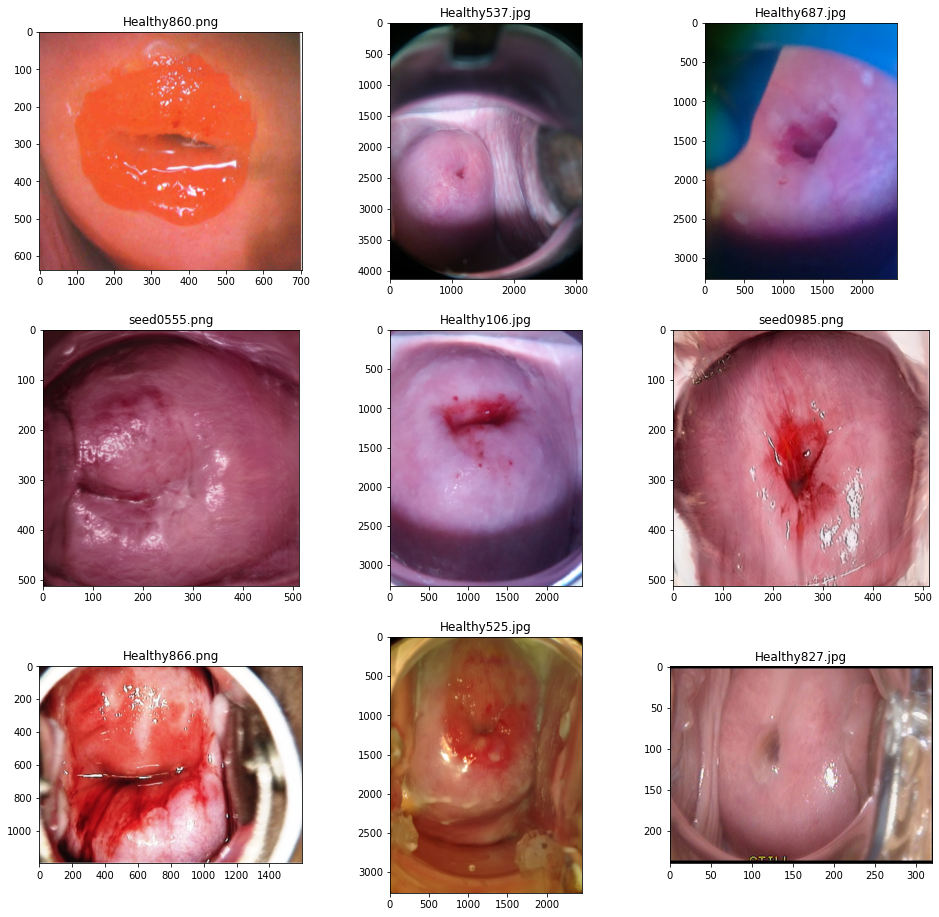

In [ ]:
labels = [path.split("/")[-1] for path in train_list]

random_idx = np.random.randint(1, len(train_list), size=9)
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for idx, ax in enumerate(axes.ravel()):
    img = Image.open(train_list[idx])
    ax.set_title(labels[idx])
    ax.imshow(img)

Далее необходимо подготовить датасет. Для этого производим аугментацию данных. То есть выполняем некоторые преобразования, и приводим картинки к общему виду. Это позволит нам избежать переобучения модели.
Далее формируем класс и загружаем датасет. Датасет содержит 4 папки различных стадий заболевания.
На данном этапе были объединены 2 и 3 стадии в качестве эксперимента, поскольку визуальные различия между ними не очень большие.

In [ ]:
  # Torch transforms
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)

train_transforms = transforms.Compose(
    [
        transforms.Resize(IMG_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)

    ]
)
val_transforms = transforms.Compose(
    [
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)

    ]
)
test_transforms = transforms.Compose(
    [
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)

    ]
)

class ColpoDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform
        
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path).convert('RGB')
        img_transformed = self.transform(img)
        name = img_path.split("/")[-1]
        
        label = 0 
        if name== "Normal":
            label = 0
          #  print(f'Normal: {label}')
        elif name== "LSIL":   
            label = 1
          #  print(f'LSIL: {label}')
        elif name== "HSIL":   
            label = 1
           # print(f'HSIL: {label}')
        else:
            label = 2
           # print(f'Invasia: {label}')
        return img_transformed, label

#defining train, validation and test dataset

train_data = ColpoDataset(train_list, transform=train_transforms)
valid_data = ColpoDataset(val_list, transform=val_transforms)
test_data = ColpoDataset(test_list, transform=test_transforms)

#loading dataloader

train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
valid_loader = DataLoader(dataset = valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True)



Далее импортируем уже готовую архитектуру VIT из библиотеки vit_pytorch.vit_for_small_dataset. 

На рисунке ниже представлена применяемая архитектура. SPT сдвигает входное изображение в нескольких направлениях и объединяет их с входным изображением. Ниже пример смещения в четырех диагональных направлениях. Затем применяется патч-разделение, как и стандартные ViT. Затем для встраивания в визуальные токены последовательно выполняются три процесса: сведение патчей, нормализация слоев и линейная проекция. В результате SPT может встраивать больше пространственной информации в визуальные маркеры и увеличивать предвзятость ViT к локальности.

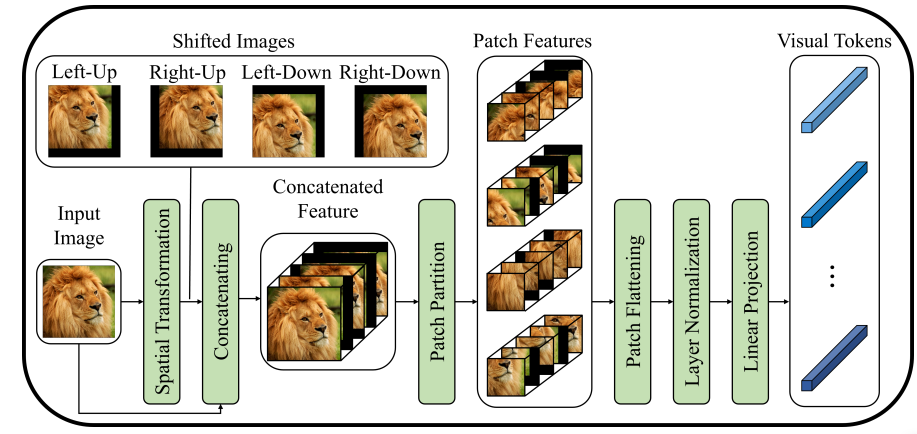

In [ ]:
device='cpu'
import torch
from vit_pytorch.vit_for_small_dataset import ViT

model = ViT(
    image_size = 224,
    patch_size = 16,
    num_classes = 3,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

model = model.to(device)

Далее идет подготовка и обучение

In [ ]:
# loss function
criterion = nn.CrossEntropyLoss()
#criterion = LabelSmoothingCrossEntropy()
criterion = criterion.to(device)

# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

# scheduler

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

#start training

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for data, label in (train_loader):
        data = data.to(device)
        #print(label)
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)
    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valid_loader:
            data = data.to(device)
            label = label.to(device)
            val_output = model(data)
            val_loss = criterion(val_output, label)
            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)
    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )    
torch.save(model, 'ViT.pt')


К настоящему моменту полученная точность на валидации достигает 70%.

Работу модели можно оценить, еcли попробовать применить кросс-валидацию. Самый распространенный пример - k-Fold cross validation. Суть метода заключается в следующем: мы делим датасет, например, на 5 частей (фолдов). Далее проводим обучение на 4 фолдах, а на 5 проводим проверку в течение заданных эпох. Затем в качестве проверочного фолда берем новый, а обучение продолжаем на оставшихся. 
Подбирая различные параметры, а также используя другие архитектуры, мы можем выбрать наилучший вариант для нашей задачи.
